In [2]:
import itertools
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import statsmodels.api as sm

import seaborn as sns
sns.set()

In [3]:
pd.options.display.max_columns = None
pd.options.display.max_rows = 10
pd.options.display.float_format = '{:.2f}'.format

In [4]:
info=pd.read_csv(r'C:\Users\Saksh\OneDrive\Documents\IMARTICUS\ML Exam\MonthWiseMarketArrivals_Clean.csv')

In [5]:
info.head(10)

,market,month,year,quantity,priceMin,priceMax,priceMod,state,city,date
0,ABOHAR(PB),January,2005,2350,404,493,446,PB,ABOHAR,January-2005
1,ABOHAR(PB),January,2006,900,487,638,563,PB,ABOHAR,January-2006
2,ABOHAR(PB),January,2010,790,1283,1592,1460,PB,ABOHAR,January-2010
3,ABOHAR(PB),January,2011,245,3067,3750,3433,PB,ABOHAR,January-2011
4,ABOHAR(PB),January,2012,1035,523,686,605,PB,ABOHAR,January-2012
5,ABOHAR(PB),January,2013,675,1327,1900,1605,PB,ABOHAR,January-2013
6,ABOHAR(PB),January,2014,440,1025,1481,1256,PB,ABOHAR,January-2014
7,ABOHAR(PB),January,2015,1305,1309,1858,1613,PB,ABOHAR,January-2015
8,ABOHAR(PB),February,2005,1400,286,365,324,PB,ABOHAR,February-2005
9,ABOHAR(PB),February,2006,1800,343,411,380,PB,ABOHAR,February-2006


In [6]:
info.shape

(10227, 10)

In [7]:
info.describe()

,year,quantity,priceMin,priceMax,priceMod
count,10227.00,10227.00,10227.00,10227.00,10227.00
mean,2009.02,76604.88,646.94,1212.76,984.28
std,4.37,124408.70,673.12,979.66,818.47
min,1996.00,20.00,16.00,145.00,80.00
25%,2006.00,8898.00,209.00,557.00,448.00
50%,2009.00,27460.00,440.00,923.00,747.00
75%,2013.00,88356.50,828.00,1527.00,1248.00
max,2016.00,1639032.00,6000.00,8192.00,6400.00


In [8]:
info.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10227 entries, 0 to 10226
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   market    10227 non-null  object
 1   month     10227 non-null  object
 2   year      10227 non-null  int64 
 3   quantity  10227 non-null  int64 
 4   priceMin  10227 non-null  int64 
 5   priceMax  10227 non-null  int64 
 6   priceMod  10227 non-null  int64 
 7   state     10227 non-null  object
 8   city      10227 non-null  object
 9   date      10227 non-null  object
dtypes: int64(5), object(5)
memory usage: 799.1+ KB


In [9]:
info.isnull().sum()

market      0
month       0
year        0
quantity    0
priceMin    0
priceMax    0
priceMod    0
state       0
city        0
date        0
dtype: int64

In [10]:
info.columns

Index(['market', 'month', 'year', 'quantity', 'priceMin', 'priceMax',
       'priceMod', 'state', 'city', 'date'],
      dtype='object')

In [12]:
columns=['market', 'month', 'year', 'quantity', 'priceMin', 'priceMax', 'state']
new_data=info.drop(columns,axis=1)

In [14]:
new_data=new_data.sort_values('date')
new_data

,priceMod,city,date
5461,254,LASALGAON,April-1996
5462,214,LASALGAON,April-1997
9260,227,SINNAR,April-1998
5463,258,LASALGAON,April-1998
6489,217,MANMAD,April-1998
...,...,...,...
6763,4714,MUMBAI,September-2015
2295,4203,DEVALA,September-2015
1741,4156,CHANDVAD,September-2015
3263,2521,HASSAN,September-2015


In [15]:
new_data['date'] = pd.to_datetime(new_data['date'])
new_data.set_index('date', inplace=True)
new_data.index

DatetimeIndex(['1996-04-01', '1997-04-01', '1998-04-01', '1998-04-01',
               '1998-04-01', '1998-04-01', '1998-04-01', '1998-04-01',
               '1998-04-01', '1998-04-01',
               ...
               '2015-09-01', '2015-09-01', '2015-09-01', '2015-09-01',
               '2015-09-01', '2015-09-01', '2015-09-01', '2015-09-01',
               '2015-09-01', '2015-09-01'],
              dtype='datetime64[ns]', name='date', length=10227, freq=None)

In [16]:
new_data['city'].unique()

array(['LASALGAON', 'SINNAR', 'MANMAD', 'MAHUVA', 'BHAVNAGAR', 'SAIKHEDA',
       'NIPHAD', 'CHAKAN', 'PIMPALGAON', 'LONAND', 'PUNE', 'GONDAL',
       'AHMEDNAGAR', 'RAHURI', 'NASIK', 'HUBLI', 'DEWAS', 'DHULIA',
       'INDORE', 'BOMBORI', 'DINDIGUL', 'HASSAN', 'KARNAL', 'RAJKOT',
       'DELHI', 'KANPUR', 'MALEGAON', 'SRINAGAR', 'SHIMLA', 'SURAT',
       'PATNA', 'KOLKATA', 'KALVAN', 'HYDERABAD', 'MUMBAI', 'DHAVANGERE',
       'CHENNAI', 'JAIPUR', 'KURNOOL', 'KOLAR', 'SOLAPUR', 'KOLHAPUR',
       'CHICKBALLAPUR', 'YEOLA', 'LUCKNOW', 'BANGALORE', 'NAGPUR',
       'BELGAUM', 'SATANA', 'AGRA', 'SANGALI', 'BIJAPUR', 'TRIVENDRUM',
       'RANCHI', 'AHMEDABAD', 'SANGAMNER', 'JODHPUR', 'JAMMU', 'GUWAHATI',
       'VARANASI', 'UJJAIN', 'JUNNAR', 'JALGAON', 'LUDHIANA', 'AMRITSAR',
       'PATIALA', 'ABOHAR', 'BHOPAL', 'DEVALA', 'JALANDHAR', 'BHUBNESWER',
       'RAIPUR', 'SHRIRAMPUR', 'DINDORI', 'VANI', 'MANDSOUR', 'BHATINDA',
       'DEORIA', 'ALWAR', 'UDAIPUR', 'COIMBATORE', 'KOTA', 'DEESA',

In [17]:
info_1=pd.DataFrame(new_data[new_data.city=='MUMBAI']["priceMod"])
info_1

,priceMod
date,
2004-04-01,397
2005-04-01,328
2006-04-01,290
2007-04-01,531
2008-04-01,418
...,...
2011-09-01,1286
2012-09-01,707
2013-09-01,4550


In [18]:
new_data

,priceMod,city
date,,
1996-04-01,254,LASALGAON
1997-04-01,214,LASALGAON
1998-04-01,227,SINNAR
1998-04-01,258,LASALGAON
1998-04-01,217,MANMAD
...,...,...
2015-09-01,4714,MUMBAI
2015-09-01,4203,DEVALA
2015-09-01,4156,CHANDVAD


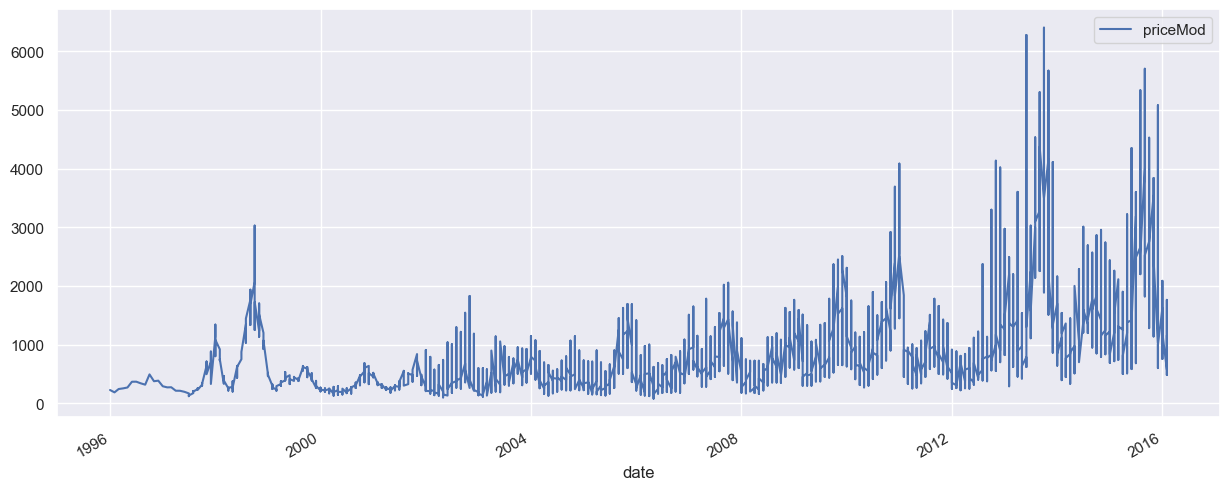

In [19]:
new_data.plot(figsize=(15,6))
plt.show()

In [21]:
y=new_data['priceMod'].resample('MS').mean()

In [22]:
y

date
1996-01-01    226.00
1996-02-01    186.00
1996-03-01    243.00
1996-04-01    254.00
1996-05-01    269.00
               ...  
2015-10-01   2838.79
2015-11-01   2101.06
2015-12-01   1427.52
2016-01-01   1186.46
2016-02-01    926.35
Freq: MS, Name: priceMod, Length: 242, dtype: float64

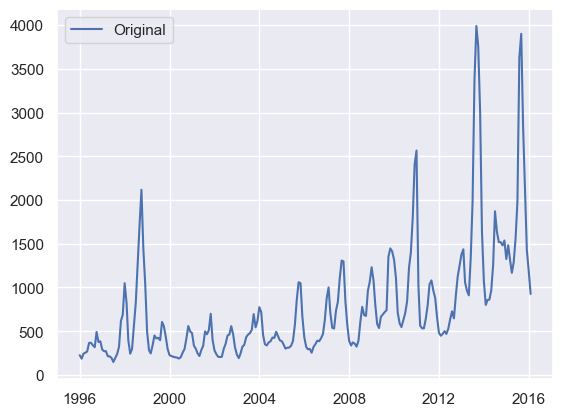

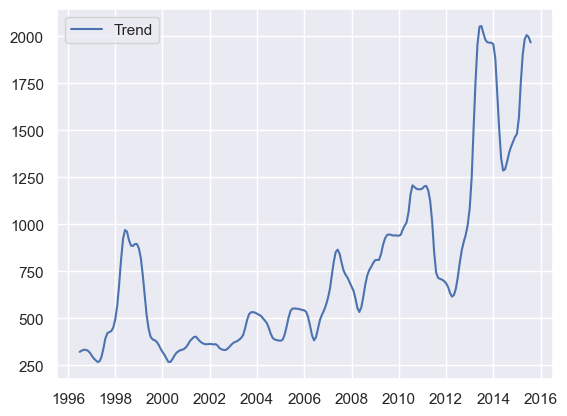

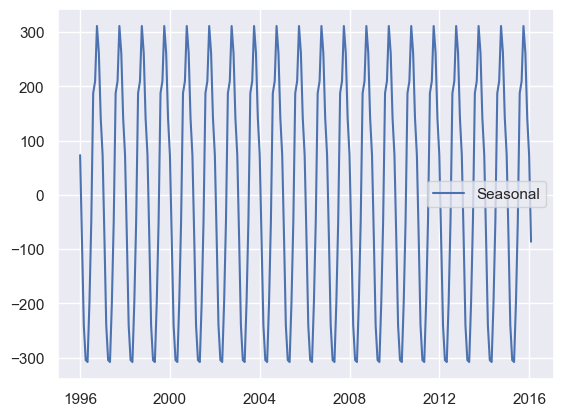

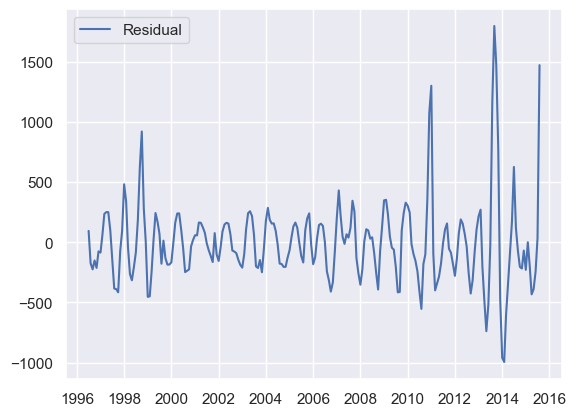

In [23]:
from statsmodels.tsa.seasonal import seasonal_decompose
decomposition = seasonal_decompose(y)

plt.plot(y, label = 'Original')
plt.legend(loc = 'best')

trend = decomposition.trend
plt.show()
plt.plot(trend, label = 'Trend')
plt.legend(loc = 'best')

seasonal = decomposition.seasonal
plt.show()
plt.plot(seasonal, label = 'Seasonal')
plt.legend(loc = 'best')

residual = decomposition.resid
plt.show()
plt.plot(residual, label = 'Residual')
plt.legend(loc='best')

In [24]:
from pandas import Series
from statsmodels.tsa.stattools import adfuller
result = adfuller(y)
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
    print('\t%s: %.3f' % (key, value))

ADF Statistic: -1.552957
p-value: 0.507171
Critical Values:
	1%: -3.459
	5%: -2.874
	10%: -2.574


##### The p-value is 0.50717,which is above the threshold (0.5) hence the null hypothesis is accepted it suggests the time series is not stationary its is having trend and seasonality.


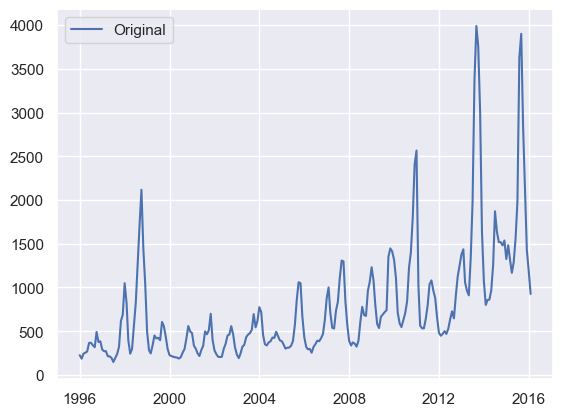

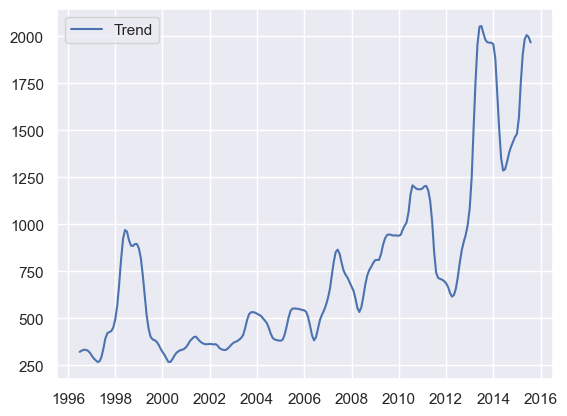

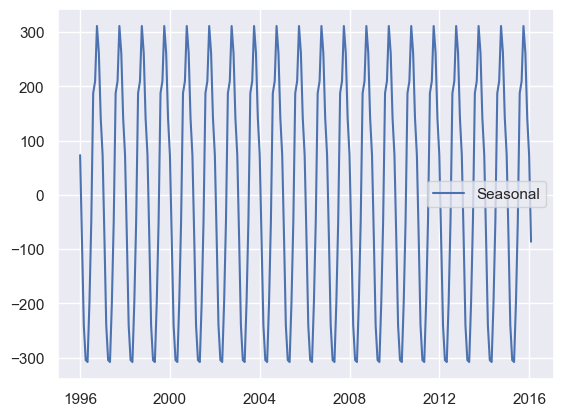

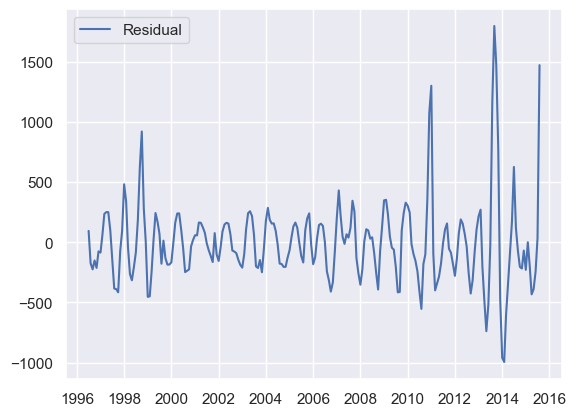

In [26]:
from statsmodels.tsa.seasonal import seasonal_decompose
decomposition = seasonal_decompose(y)

plt.plot(y, label = 'Original')
plt.legend(loc = 'best')

trend = decomposition.trend
plt.show()
plt.plot(trend, label = 'Trend')
plt.legend(loc = 'best')

seasonal = decomposition.seasonal
plt.show()
plt.plot(seasonal, label = 'Seasonal')
plt.legend(loc = 'best')

residual = decomposition.resid
plt.show()
plt.plot(residual, label = 'Residual')
plt.legend(loc='best')


In [27]:
p = d = q = range(0, 2)
pdq = list(itertools.product(p, d, q))
seasonal_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, d, q))]
print('Examples of parameter combinations for Seasonal ARIMA...')
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[1]))
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[2]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[3]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[4]))

Examples of parameter combinations for Seasonal ARIMA...
SARIMAX: (0, 0, 1) x (0, 0, 1, 12)
SARIMAX: (0, 0, 1) x (0, 1, 0, 12)
SARIMAX: (0, 1, 0) x (0, 1, 1, 12)
SARIMAX: (0, 1, 0) x (1, 0, 0, 12)


In [29]:
from pylab import rcParams
XY=[]
for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            mod = sm.tsa.statespace.SARIMAX(y, order=param,
seasonal_order=param_seasonal,
enforce_stationarity=False, 
enforce_invertibility=False)
            results = mod.fit()
            print('ARIMA{}x{}12 - AIC:{}'.format(param, param_seasonal, results.aic))
            fr.append(results.aic)
        except:
            continue

ARIMA(0, 0, 0)x(0, 0, 0, 12)12 - AIC:4022.9705236045165
ARIMA(0, 0, 0)x(0, 0, 1, 12)12 - AIC:3758.82073469193
ARIMA(0, 0, 0)x(0, 1, 0, 12)12 - AIC:3639.422542690125
ARIMA(0, 0, 0)x(0, 1, 1, 12)12 - AIC:3369.326171739427
ARIMA(0, 0, 0)x(1, 0, 0, 12)12 - AIC:3648.8387262242145
ARIMA(0, 0, 0)x(1, 0, 1, 12)12 - AIC:3509.549059870367
ARIMA(0, 0, 0)x(1, 1, 0, 12)12 - AIC:3368.3149004536717
ARIMA(0, 0, 0)x(1, 1, 1, 12)12 - AIC:3347.003682067155
ARIMA(0, 0, 1)x(0, 0, 0, 12)12 - AIC:3719.2673012609985
ARIMA(0, 0, 1)x(0, 0, 1, 12)12 - AIC:3487.5486780462975
ARIMA(0, 0, 1)x(0, 1, 0, 12)12 - AIC:3425.634762931723
ARIMA(0, 0, 1)x(0, 1, 1, 12)12 - AIC:3151.354251665222
ARIMA(0, 0, 1)x(1, 0, 0, 12)12 - AIC:3438.3257752285044
ARIMA(0, 0, 1)x(1, 0, 1, 12)12 - AIC:3290.6895725556524
ARIMA(0, 0, 1)x(1, 1, 0, 12)12 - AIC:3171.933770578762
ARIMA(0, 0, 1)x(1, 1, 1, 12)12 - AIC:3130.779469528703
ARIMA(0, 1, 0)x(0, 0, 0, 12)12 - AIC:3409.2400086977204
ARIMA(0, 1, 0)x(0, 0, 1, 12)12 - AIC:3251.8090904109754
AR

In [30]:
mod = sm.tsa.statespace.SARIMAX(y,
                                order=(0, 1, 1),
                                seasonal_order=(0, 1, 1, 12),
                                enforce_invertibility=False)
results = mod.fit()
print(results.summary().tables[1])

                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1          0.4577      0.046     10.030      0.000       0.368       0.547
ma.S.L12      -0.9043      0.058    -15.620      0.000      -1.018      -0.791
sigma2       6.29e+04   2636.315     23.858      0.000    5.77e+04    6.81e+04


In [31]:
results

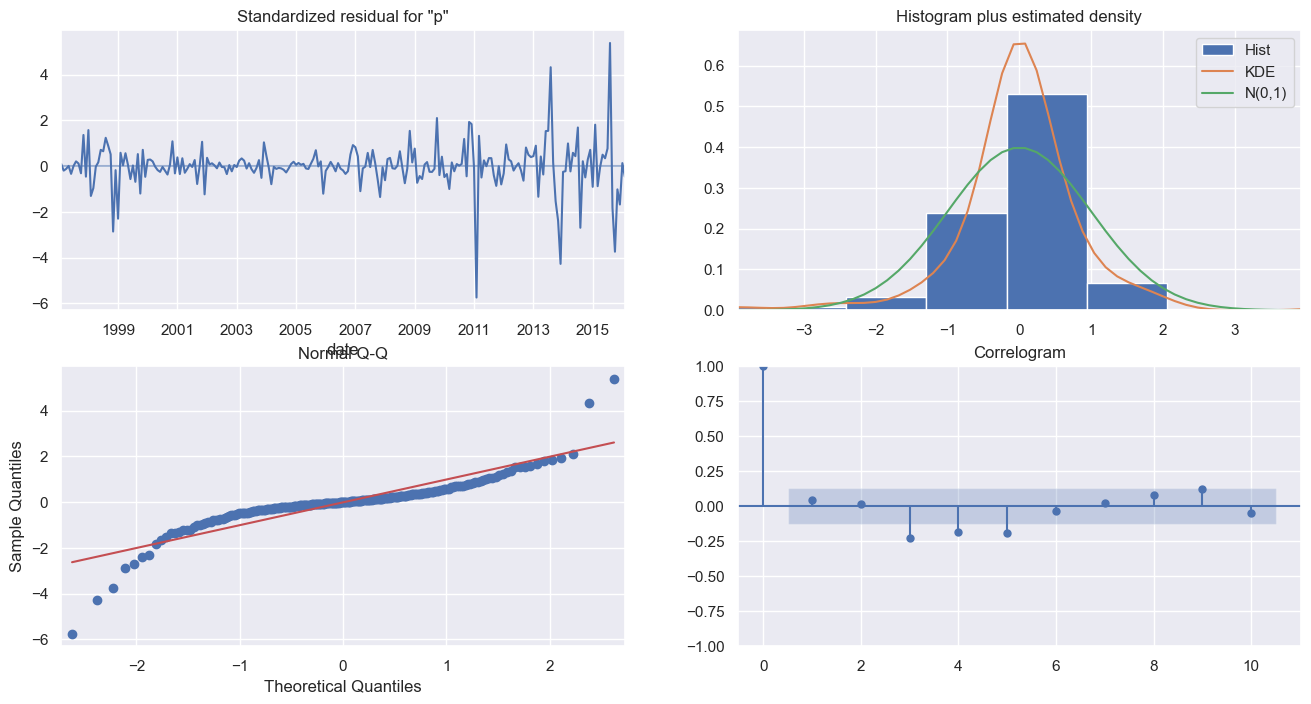

In [34]:
results.plot_diagnostics(figsize=(16, 8))
plt.show()

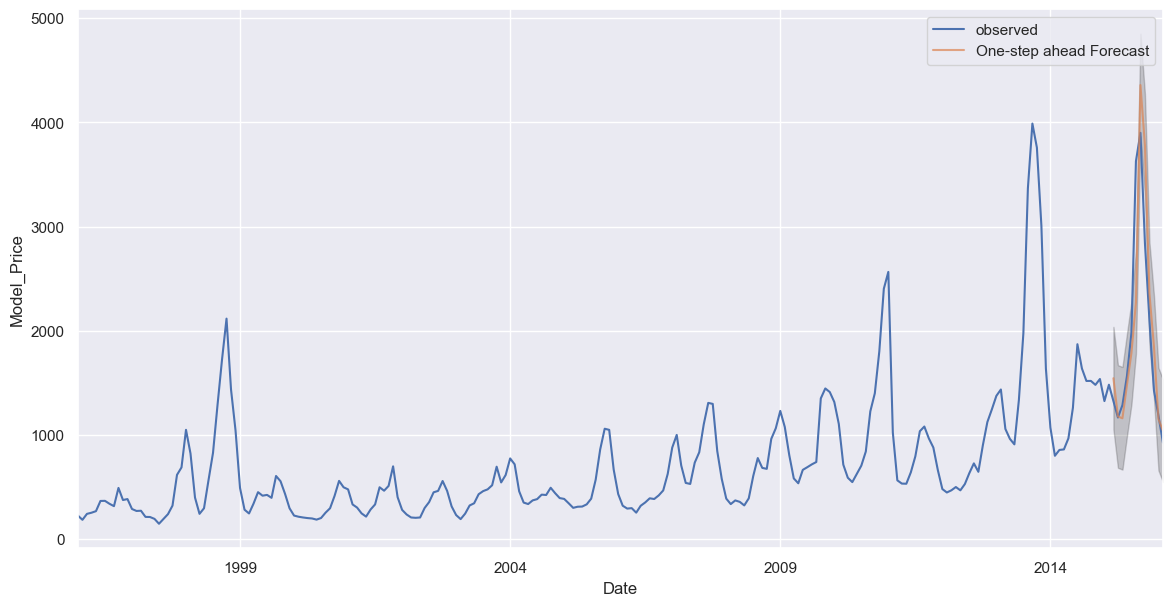

In [35]:
pred = results.get_prediction(start=pd.to_datetime('2015-03-01'), dynamic=False)
pred_ci = pred.conf_int()
ax = y['1996':].plot(label='observed')
pred.predicted_mean.plot(ax=ax, label='One-step ahead Forecast', alpha=.7, figsize=(14, 7))
ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.2)
ax.set_xlabel('Date')
ax.set_ylabel('Model_Price')
plt.legend()
plt.show()

In [37]:
y_forecasted = pred.predicted_mean
y_truth = y['2015-03-01':]
mse = ((y_forecasted - y_truth) ** 2).mean()
print('The Mean Squared Error of our forecasts is {}'.format(round(mse, 2)))

print('The Root Mean Squared Error of our forecasts is {}'.format(round(np.sqrt(mse), 2)))

The Mean Squared Error of our forecasts is 274879.5
The Root Mean Squared Error of our forecasts is 524.29


In [38]:
from statsmodels.tsa.stattools import acf, pacf
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

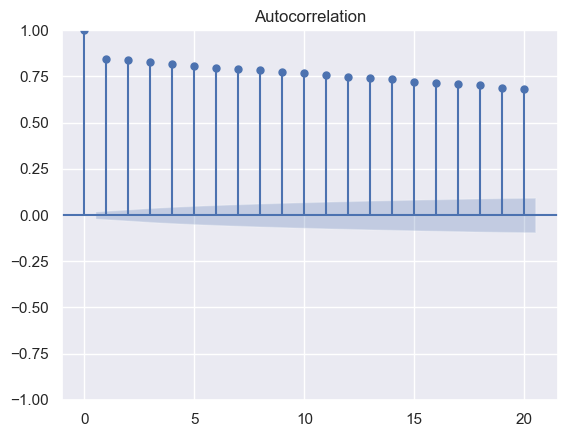

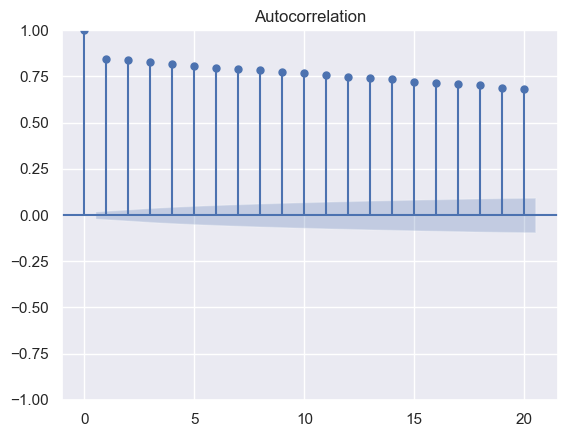

In [39]:
plot_acf(new_data['priceMod'].tolist(), lags=20)

            lower priceMod  upper priceMod
2016-03-01          233.83         1218.54
2016-04-01         -201.66         1539.00
2016-05-01         -449.85         1806.28
2016-06-01         -510.54         2163.48
2016-07-01         -486.08         2548.82
...                    ...             ...
2016-11-01         -730.70         3446.81
2016-12-01        -1039.22         3378.00
2017-01-01        -1250.52         3394.05
2017-02-01        -1529.00         3332.17
2017-03-01        -1799.51         3297.37

[13 rows x 2 columns]


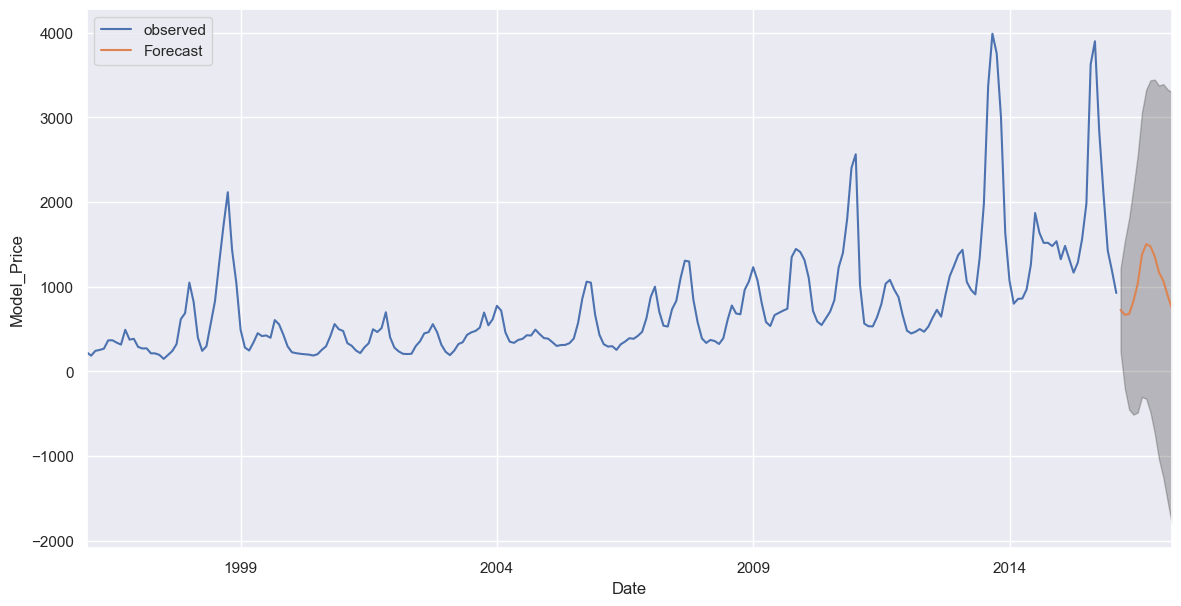

In [40]:
pred_uc = results.get_forecast(steps=13)
pred_ci = pred_uc.conf_int()
ax = y.plot(label='observed', figsize=(14, 7))
pred_uc.predicted_mean.plot(ax=ax, label='Forecast')
ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.25)
ax.set_xlabel('Date')
ax.set_ylabel('Model_Price')
print(pred_ci)
plt.legend()
plt.show()

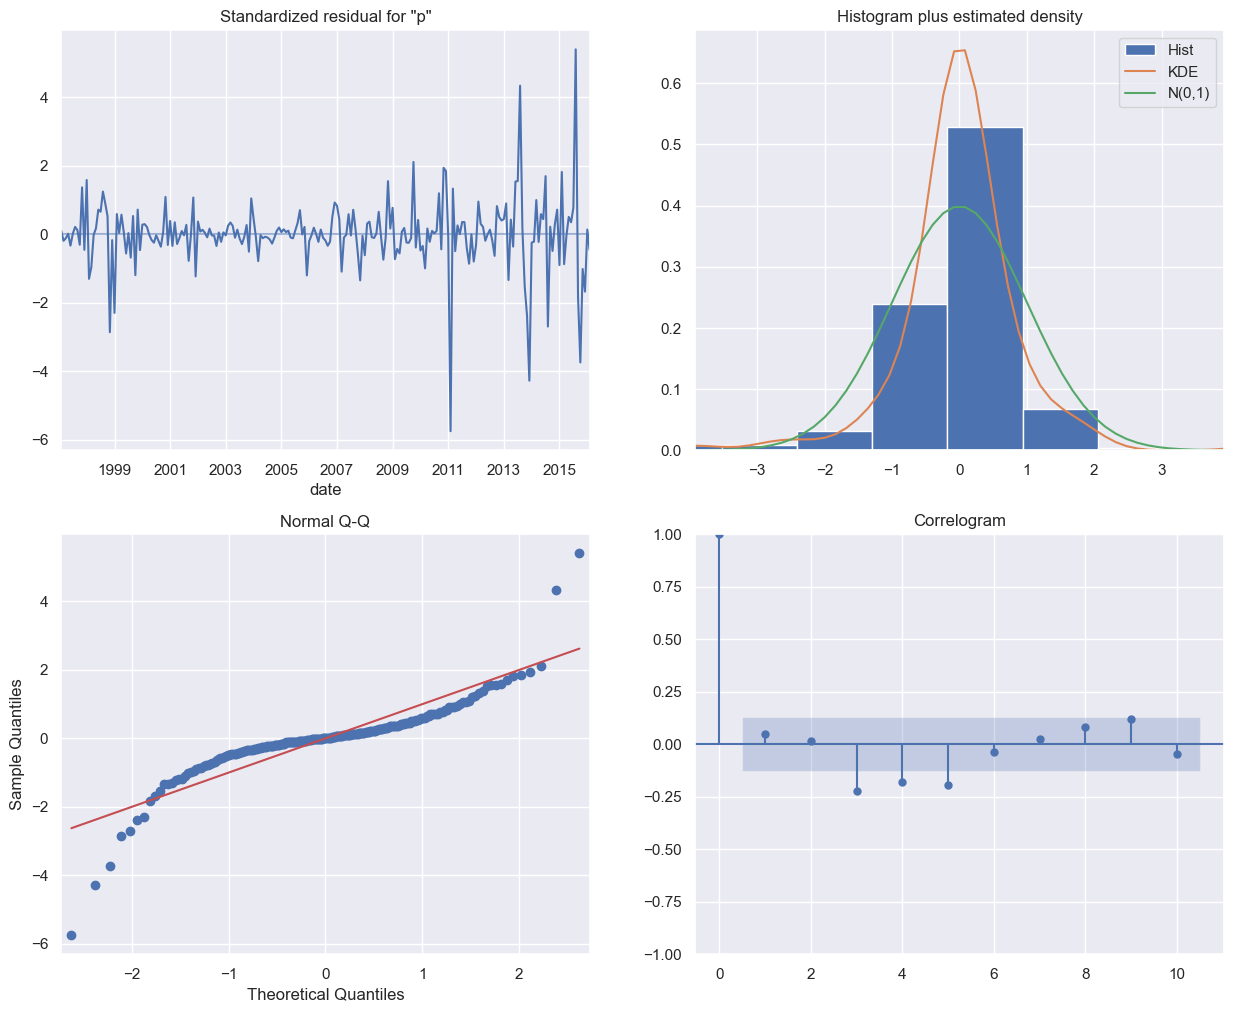

In [41]:
results.plot_diagnostics(figsize=(15,12))
plt.show()

## Conclusion
#### onion sales experience a steady, proportional rise as time progresses, particularly during the off season at the start of the year in India.
